<a href="https://colab.research.google.com/github/ashikbatchu/covid-19-detector-using-x-ray/blob/master/Covid_19_Detector_using_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset https://cb.lk./covid_19
!wget  https://cb.lk./covid_19

In [ ]:
!unzip covid_19

In [ ]:
Train_PATH = "CovidDataset/Train"
VAL_PATH ="CovidDataser/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN Based Model in Keras(Binary modle)

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


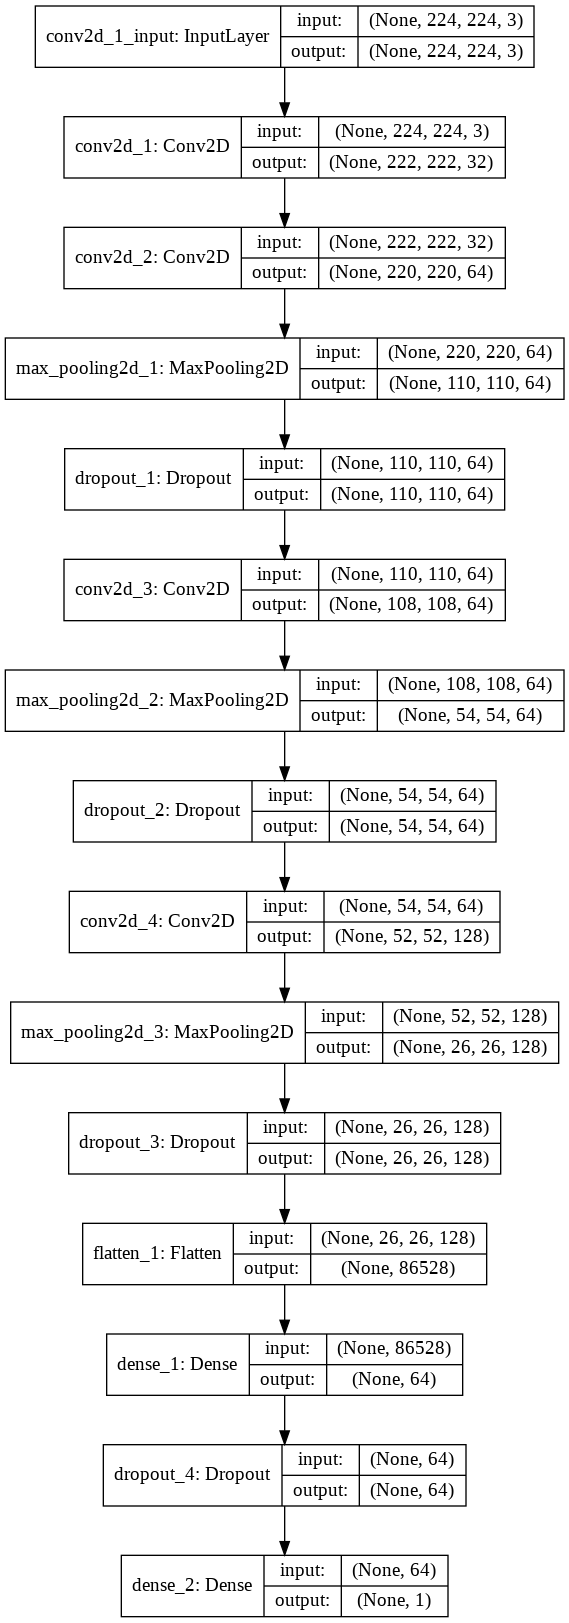

In [ ]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.2698 - accuracy: 0.5938 - val_loss: 0.6732 - val_accuracy: 0.5167
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.5832 - accuracy: 0.7070 - val_loss: 0.5195 - val_accuracy: 0.9167
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.4276 - accuracy: 0.8047 - val_loss: 0.4302 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.3261 - accuracy: 0.8906 - val_loss: 0.1708 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.2410 - accuracy: 0.9062 - val_loss: 0.1286 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.1969 - accuracy: 0.9336 - val_loss: 0.1833 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.1622 - accuracy: 0.9453 - val_loss: 0.0756 - val_accuracy: 0.9833
Epoch 8/10
8/8 [========================

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
print(train_generator)
if result[0] != 1:
    prediction = 'Positive'
else:
    prediction = 'Nigative'
print(prediction)

[[1.]]
Nigative
